In [4]:
!pip install pyreadstat

  Using cached pyreadstat-1.1.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.6 MB)


In [129]:
import pandas as pd
from pathlib import Path
import pyreadstat
import src

project_dir = Path(src.__file__).parents[1]
data_dir = project_dir / 'data'



df_2006, metadata_2006 = pyreadstat.pyreadstat.read_por(
    f'{data_dir}/external/archiwum_danych_spolecznych/sondaz_2006.por', 
    encoding='cp1250')
df_2008, metadata_2008 = pyreadstat.pyreadstat.read_por(
    f'{data_dir}/external/archiwum_danych_spolecznych/sondaz_2008.por', 
    encoding='cp1250')



In [131]:
df_2008

,ID,ROK,MIESIAC,RECORDID,URODZONY,PLEC,KLM6,WOJ,Q7,Q8,...,Q119,Q120,Q121,Q122,Q123,Q124,Q126,Q127,Q128,WAGA
0,223.0,2008.0,12.0,1.0,1982.0,2.0,5.0,1.0,11.0,4.0,...,1.0,4.0,1.0,2.0,99.0,,NaN,2.0,9.0,0.725475
1,223.0,2008.0,12.0,2.0,1962.0,1.0,5.0,1.0,2.0,1.0,...,2.0,99.0,2.0,9.0,3.0,,150.0,2.0,9.0,1.406790
2,223.0,2008.0,12.0,3.0,1934.0,2.0,5.0,1.0,7.0,4.0,...,1.0,4.0,1.0,1.0,99.0,,NaN,2.0,9.0,0.986669
3,223.0,2008.0,12.0,4.0,1950.0,2.0,1.0,1.0,2.0,4.0,...,1.0,4.0,1.0,2.0,99.0,,NaN,2.0,9.0,0.963017
4,223.0,2008.0,12.0,5.0,1945.0,1.0,1.0,1.0,2.0,4.0,...,1.0,4.0,1.0,2.0,99.0,,NaN,2.0,9.0,0.955896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,223.0,2008.0,12.0,1007.0,1975.0,2.0,1.0,8.0,6.0,4.0,...,2.0,99.0,2.0,9.0,6.0,,3.0,2.0,9.0,1.035492
1007,223.0,2008.0,12.0,1008.0,1940.0,1.0,1.0,8.0,4.0,4.0,...,2.0,99.0,2.0,9.0,99.0,,NaN,1.0,1.0,0.806417
1008,223.0,2008.0,12.0,1009.0,1950.0,2.0,1.0,8.0,4.0,4.0,...,2.0,99.0,1.0,8.0,99.0,,NaN,2.0,9.0,0.710032
1009,223.0,2008.0,12.0,1010.0,1983.0,1.0,1.0,11.0,8.0,1.0,...,1.0,97.0,1.0,1.0,4.0,,3.0,2.0,9.0,0.763712


In [156]:
questions = [
'utraty obecnej pracy',
'sytuacj� na rynku pracy',
'ze swoich dochod�w i sytuacji finansowej',
'ze stanu swojego zdrowia',
'z przebiegu pracy zawodowej'
]


def find_column_names(questions, metadata):
    return [col_name for col_name, col_label in zip(metadata.column_names, metadata.column_labels) if any(question in col_label for question in questions)]

columns = [col_name for col_name, col_label in zip(metadata_2008.column_names, metadata_2008.column_labels) if any(question in col_label for question in questions)]

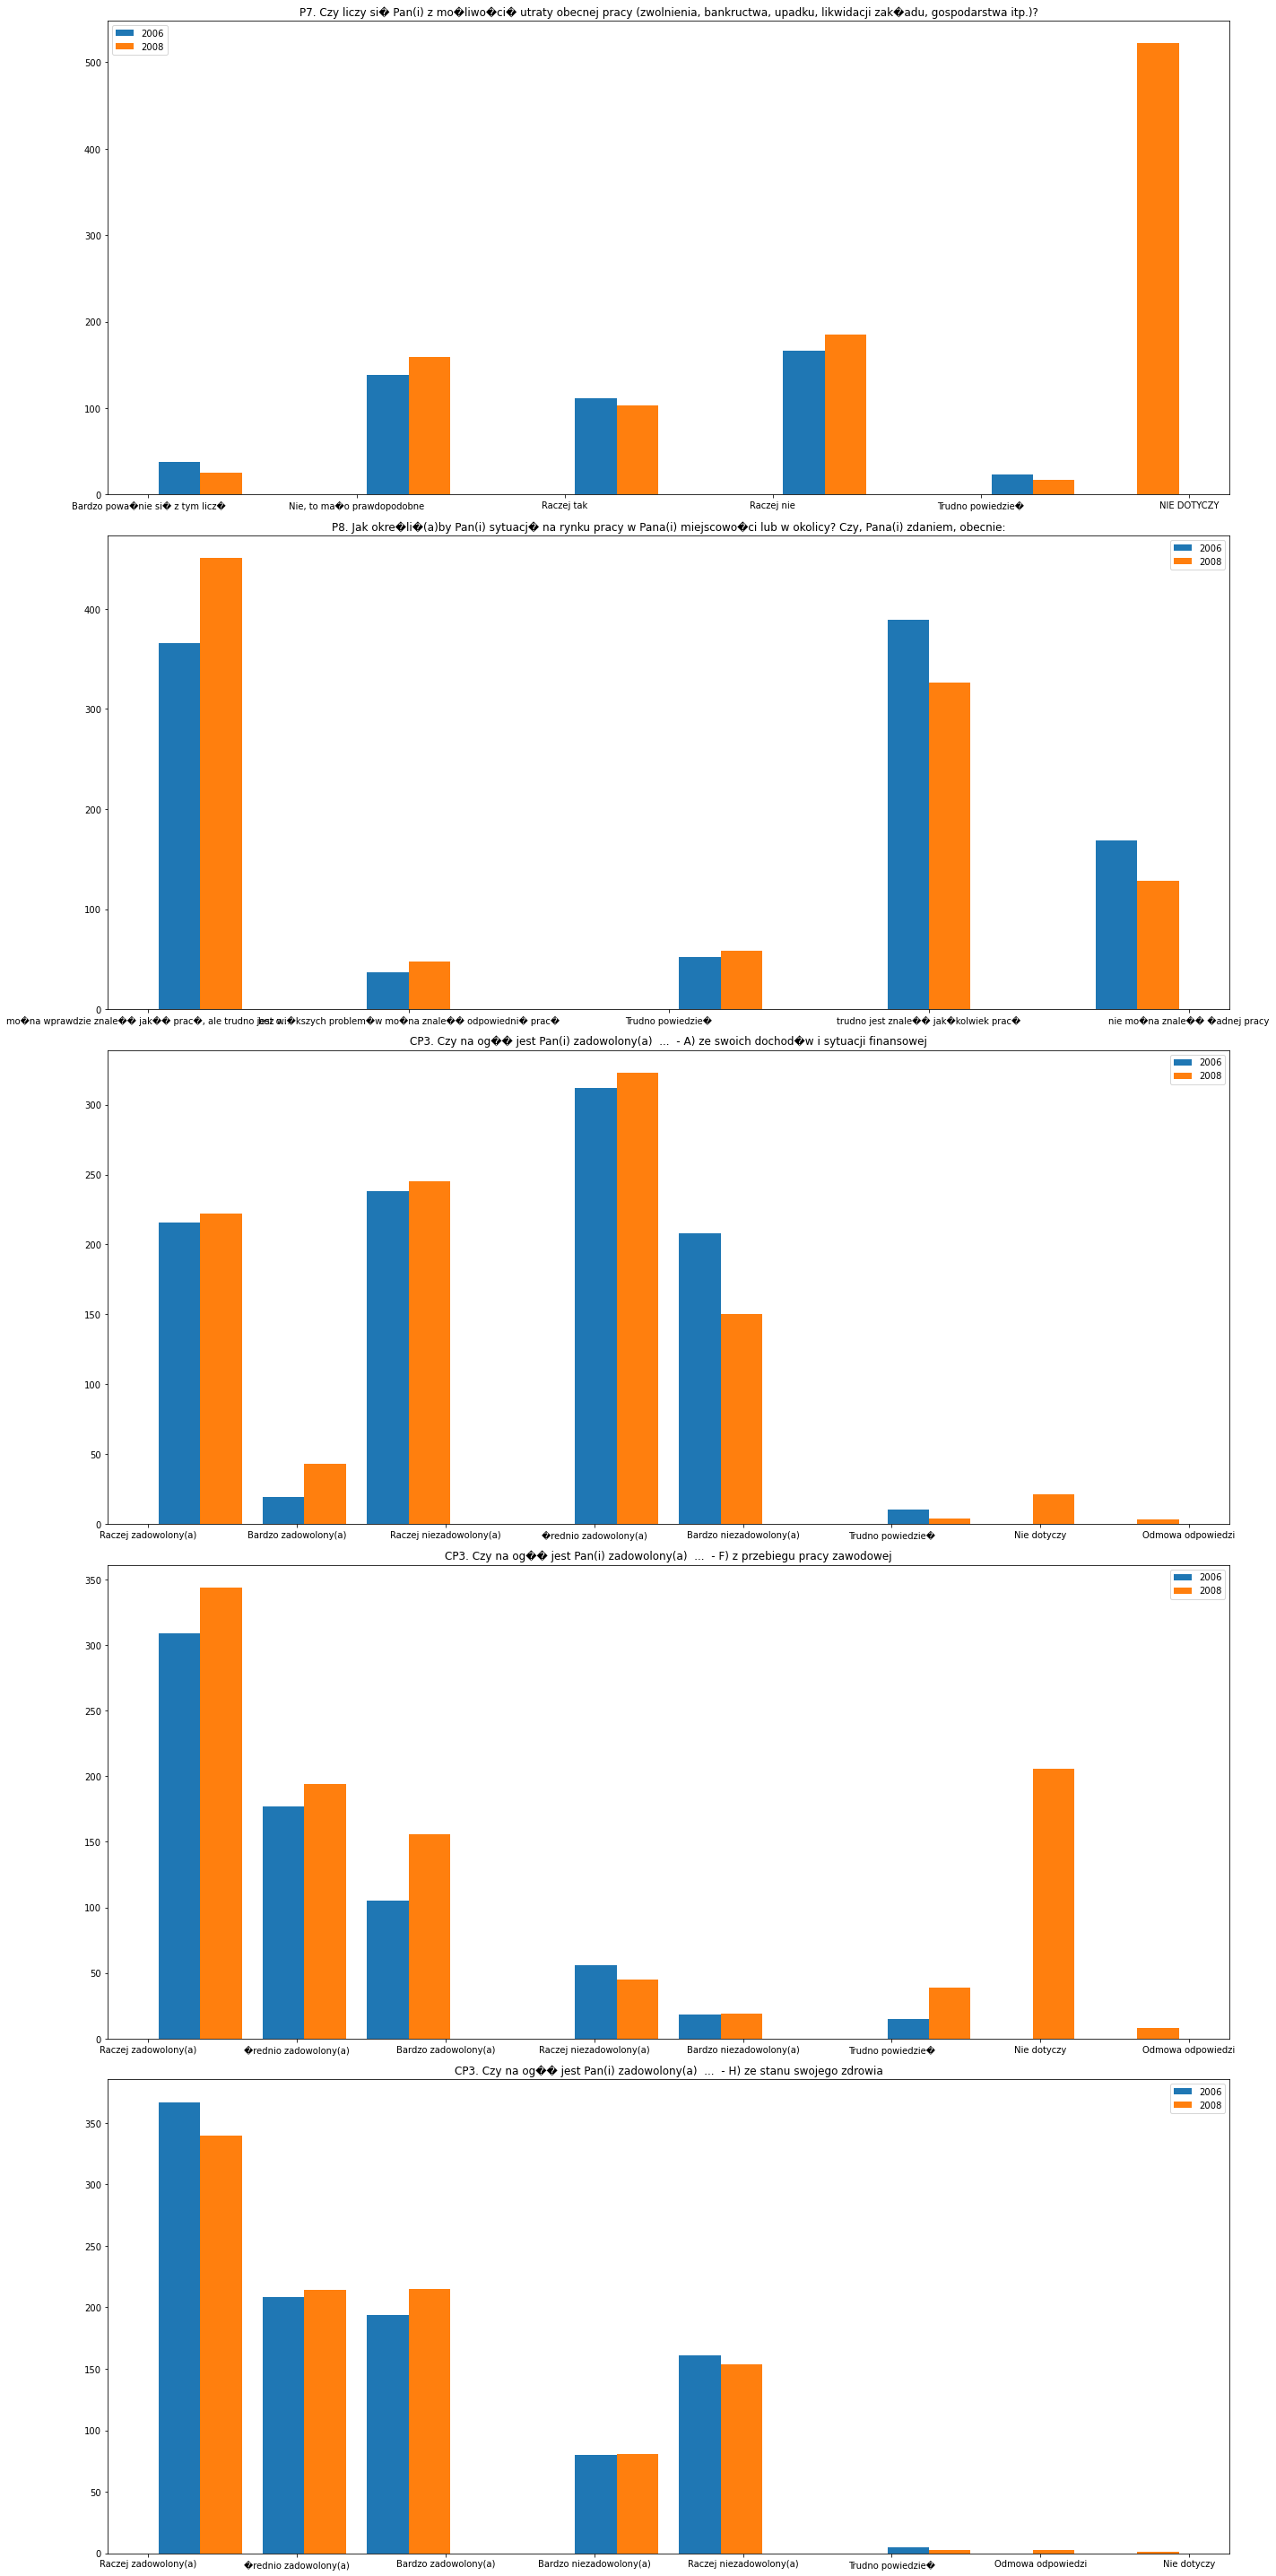

In [184]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(len(columns), 1, figsize=(20, 40))


columns_2008 = find_column_names(questions, metadata_2008)
columns_2006 = find_column_names(questions, metadata_2006)

for col_2006, col_2008 in zip(columns_2006, columns_2008):
    metadata_2006.variable_value_labels[col_2006] = metadata_2008.variable_value_labels[col_2008]




for ax, col_2008, col_2006 in zip(axes.ravel(), columns_2008, columns_2006):
    ax.set_title(metadata_2008.column_names_to_labels[col_2008], loc='center', wrap=True)
    ax.hist([
        df_2006[col_2006].dropna().map(metadata_2006.variable_value_labels[col_2006]),
        df_2008[col_2008].map(metadata_2008.variable_value_labels[col_2008]),
    ])
    ax.legend(['2006','2008'])
    

fig.tight_layout()